In [1]:
%matplotlib inline 

import os
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
eng_levels = [-2, -1, 0, 1, 2, 3]

## DisVoice Features

In this analysis, our aim is finding if we can get a relation between engagement and all sounds in the classroom.

In [3]:
base_dir = "../sound/features/"

In [4]:
# Load data
df = pd.read_csv(os.path.join(base_dir, 'all.csv'))
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]
labels = df['label']
df.head()

,F0avg,F0std,F0max,F0min,F0skew,F0kurt,F0tiltavg,F0mseavg,F0tiltstd,F0msestd,...,maxdurpause,mindurpause,PVU,PU,UVU,VVU,VP,UP,path,label
0,107.251472,4.754879,112.142250,97.891090,-1.044098,-0.510219,38.107999,21.846451,0.000000,0.000000,...,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,C:\Users\ASABUNCUOGLU13\Documents\data\vol02\e...,0
1,107.249100,4.753147,112.142258,97.891144,-1.044382,-0.509233,38.172404,21.827407,0.000000,0.000000,...,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,C:\Users\ASABUNCUOGLU13\Documents\data\vol02\e...,0
2,114.073090,35.353394,238.759155,69.948997,1.999682,2.876741,-39.423164,100.290732,227.348111,195.716531,...,1.19,0.17,1.298283,3.626374,0.358011,0.641989,0.494490,0.275758,C:\Users\ASABUNCUOGLU13\Documents\data\vol02\e...,-1
3,131.886368,30.292049,241.647980,66.003014,0.802149,0.373328,-31.940573,135.096570,237.915601,177.521635,...,0.98,0.15,1.087145,4.711485,0.230744,0.769256,0.707593,0.212247,C:\Users\ASABUNCUOGLU13\Documents\data\vol02\e...,0
4,118.834885,20.374716,223.293121,66.754921,1.245751,3.671583,-79.806733,89.552508,227.226774,94.320115,...,0.93,0.16,1.166132,5.765267,0.202269,0.797731,0.684083,0.173452,C:\Users\ASABUNCUOGLU13\Documents\data\vol02\e...,1


In [5]:
df.describe()

,F0avg,F0std,F0max,F0min,F0skew,F0kurt,F0tiltavg,F0mseavg,F0tiltstd,F0msestd,...,kurtosisdurpause,maxdurpause,mindurpause,PVU,PU,UVU,VVU,VP,UP,label
count,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,...,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000
mean,135.909312,37.380109,256.157001,74.137978,0.883629,0.752929,-26.439708,225.786535,236.902733,325.324473,...,0.995044,0.767593,0.136620,0.903284,4.763207,0.157084,0.629953,0.653921,0.157048,0.740741
std,22.135676,13.281548,54.314644,15.442431,0.711810,2.155567,91.214013,185.454923,112.950233,247.480516,...,3.389480,0.834653,0.075564,0.858282,4.226570,0.095691,0.332158,0.443111,0.103034,0.893078
min,0.000000,0.000000,0.000000,0.000000,-2.873404,-1.780716,-533.061579,0.000000,0.000000,0.000000,...,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,125.447073,27.957121,222.260342,66.565943,0.517543,-0.515922,-64.908534,140.174148,162.434716,179.924224,...,-0.752958,0.350000,0.150000,0.616394,3.206175,0.114370,0.715835,0.401935,0.082409,0.000000
50%,132.533424,37.645588,252.866173,68.653675,0.892026,0.121669,-22.016753,186.477487,230.710488,268.075888,...,0.000000,0.650000,0.150000,0.910528,4.521222,0.182217,0.784006,0.695401,0.183714,1.000000
75%,142.452671,47.335193,298.837517,74.648333,1.292410,1.496552,17.310380,263.200099,300.942808,442.431997,...,1.707911,0.982500,0.162500,1.162284,5.627925,0.221217,0.825893,0.914031,0.227907,1.000000
max,228.438095,72.570824,347.213013,155.831985,3.383341,12.482176,276.630667,2142.452307,646.024046,2091.678276,...,27.571327,8.660000,0.590000,9.353846,29.500000,0.492308,0.926829,2.519149,0.523139,2.000000


In [6]:
# Define Feature Series Ranges
r_f0 = range(1,6)
df_f0 = df.iloc[:, r_f0]
df_f0.to_csv("../sound/reduced/f0.tsv", sep="\t", index=False)

In [7]:
title = "All DisVoice Features"

In [8]:
dfc = df.iloc[:,:-2] # remove path and label
not_nan_index = ~dfc.isna().any(axis=1)
dfc = dfc[not_nan_index]
labels = labels[not_nan_index]

In [9]:
labels.value_counts()

 1    84
 0    65
 2    47
-1    18
Name: label, dtype: int64

In [10]:
print(len(dfc), len(labels))

214 214


## Reduce with PCA

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_samples = scaler.fit_transform(dfc)

pca = PCA(n_components=2)
pca.fit(scaled_samples)

print(pca.explained_variance_ratio_)

print(pca.singular_values_)

[0.28334778 0.0587432 ]
[79.02880338 35.98357514]


In [14]:
principalComponents = pca.fit_transform(scaled_samples)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2'])
principalDf.head()

,pc1,pc2
0,14.278471,-2.154297
1,14.278479,-2.154331
2,-1.200195,-3.193296
3,-2.076647,0.417228
4,0.184800,-1.253331


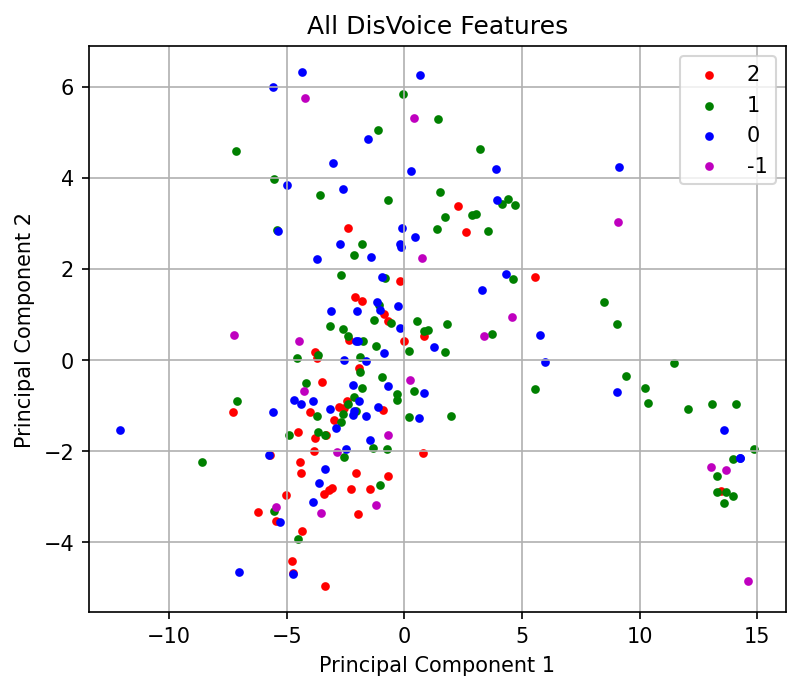

In [15]:
from tueplots import figsizes, fonts
from tueplots.constants.color import palettes

fonts.neurips2021()
plt.rcParams.update({"figure.dpi": 150})


fig = plt.figure(figsize = (6,5))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title(title)

#targets = [2, 1, 0, -1, -2]
#colors = palettes.pn[:5]

targets = [2, 1, 0, -1]
colors = ['r', 'g', 'b', 'm']


for target, color in zip(targets,colors):
    indicesToKeep = labels.values == target
    ax.scatter(principalDf.loc[indicesToKeep, 'pc1']
               , principalDf.loc[indicesToKeep, 'pc2']
               , color = color
               , s = 10)
ax.legend(targets)
ax.grid()

#plt.xlim([-103400, -103700])
#plt.ylim([0, 1000])

plt.show()
fig.savefig('fig_voice/%s-PCA.png' % title)

### Correlation

In [ ]:
corr = dfc.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
f.savefig('fig/%s-corr.png' % title)

In [ ]:
dfc.drop("score", axis=1).apply(lambda x: x.corr(dfc['score']))

### Profiling

In [16]:
from pandas_profiling import ProfileReport

profile = ProfileReport(dfc, title="Disvoice Profiling Report",
                        #minimal=True,
                        correlations={
                            "pearson": {"calculate": True},
                            "spearman": {"calculate": False},
                            "kendall": {"calculate": True},
                            "phi_k": {"calculate": False},
                        })

In [17]:
#profile.to_widgets()
#profile.to_notebook_iframe()
profile.to_file("../sound/disvoice-profiling-report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]